In [1]:
import seaborn as sns

In [4]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Figure-level vs. axes-level functions

## Axes-level functions

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

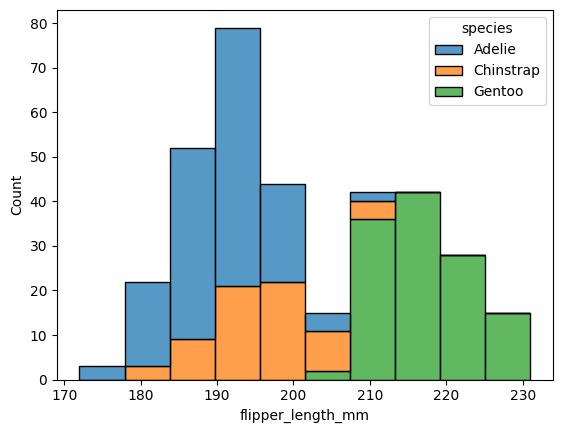

In [7]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

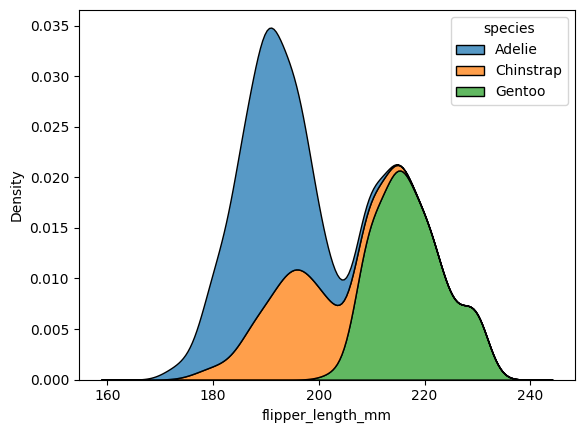

In [6]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## Figure-level functions

As `Figure-level functions` criam uma nova figura e podem gerar múltiplos gráficos em uma única figura.

![](figure-level.png)

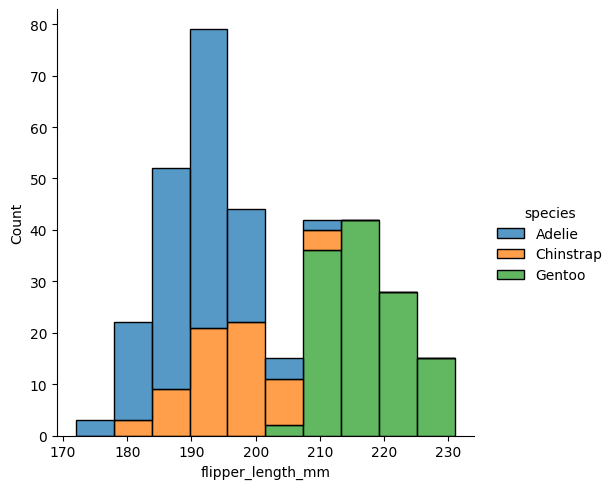

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

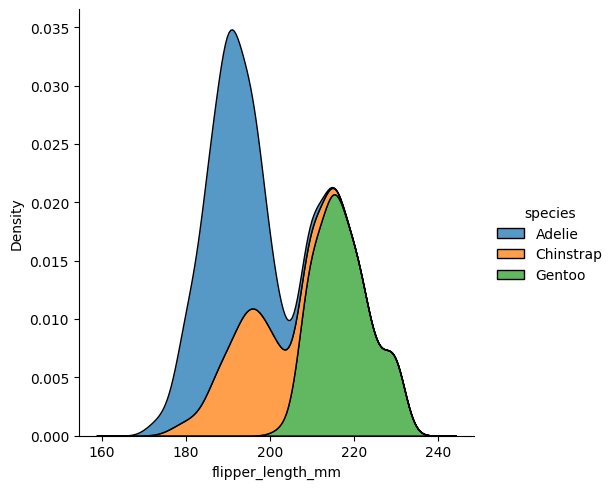

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

### 3 graficos, 1 figura

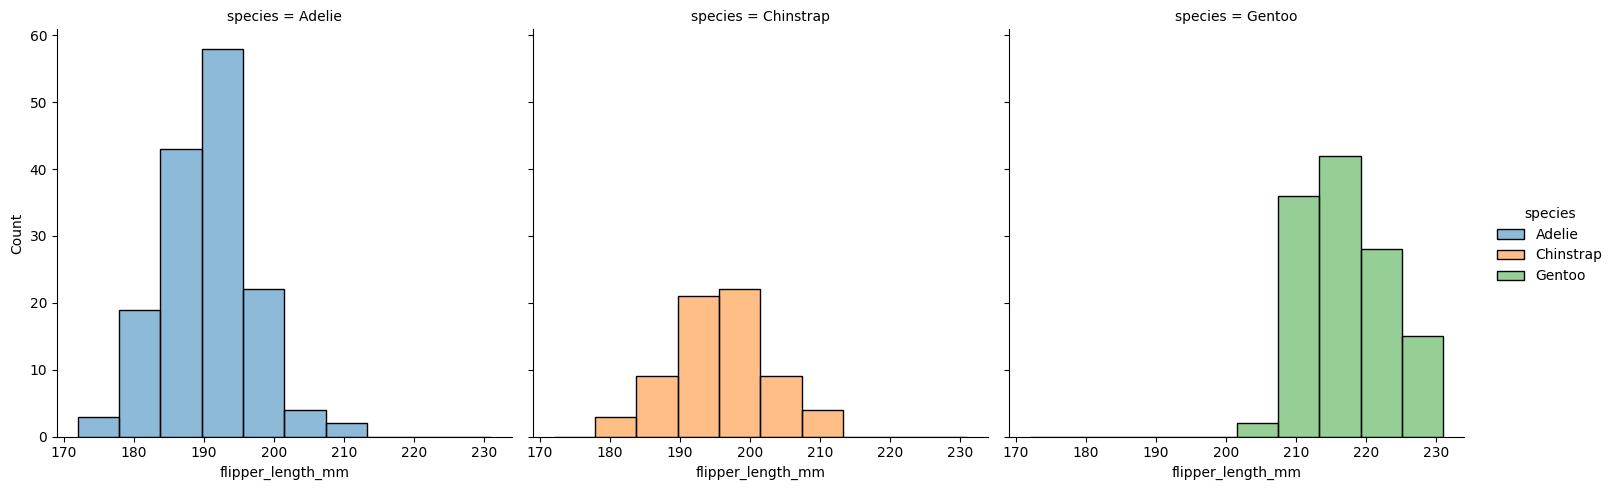

In [9]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

## Axes-level functions make self-contained plots

Ideal para quando se quer criar subplots com graficos diferentes de forma independente.

In [10]:
import matplotlib.pyplot as plt

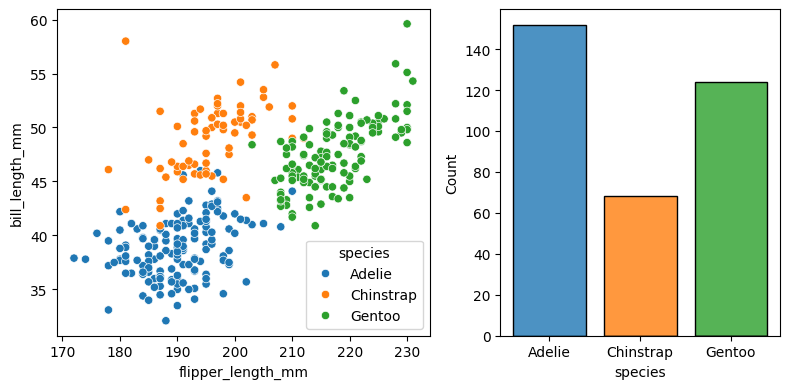

In [11]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## Figure-level functions own their figure

`Figure-level functions` não podem (facilmente) ser compostas com outros gráficos. Por design, eles “possuem” sua própria figura, incluindo sua inicialização, portanto <span style="color:red">**não faz sentido usar uma Figure-level functions para desenhar um gráfico em eixos existentes**</span>. 

No entanto, é possível ir além do que as `Figure-level functions` oferecem acessando os eixos matplotlib no objeto que elas retornam e adicionando outros elementos ao gráfico dessa forma:

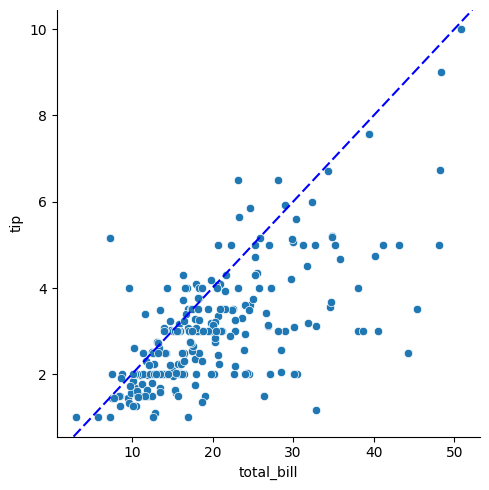

In [13]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2)) # Adiciona uma linha

## Customizing plots from a figure-level function

As `Figure-level functions` retornam uma instância `FacetGrid`, que possui alguns métodos para personalizar atributos do gráfico de uma forma que seja “inteligente” em relação à organização do subtrama. 
Por exemplo, você pode alterar os rótulos nos eixos externos usando uma única linha de código:

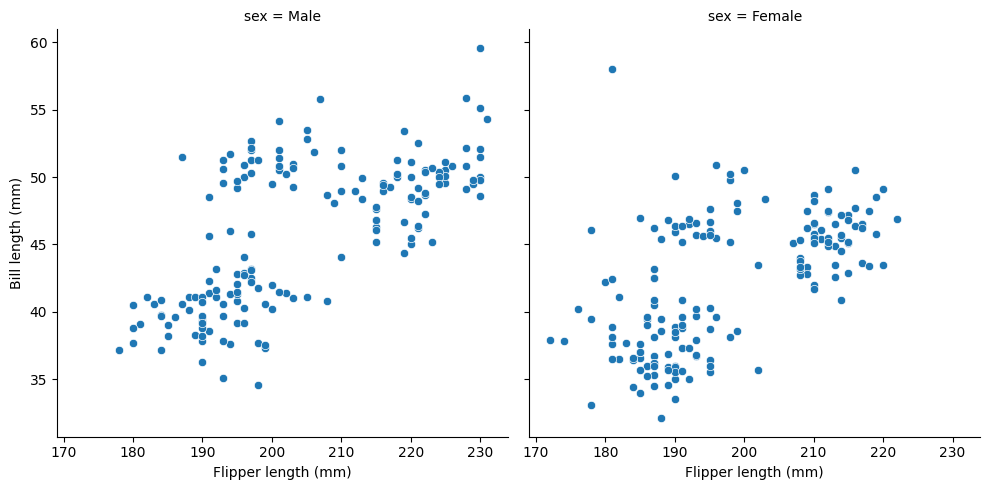

In [14]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

# Specifying figure sizes

Para aumentar ou diminuir o tamanho de um gráfico matplotlib, você define a largura e a altura de toda a figura, no `rcParams global`, ao configurar o gráfico (por exemplo, com o parâmetro `matplotlib.pyplot.subplots()`), ou por chamando um método no objeto figure. Ao usar uma `axes-level function`, as mesmas regras se aplicam: 
o tamanho do gráfico é determinado pelo tamanho da figura da qual faz parte e pelo layout dos eixos nessa `figura.figsizematplotlib.Figure.set_size_inches()`


Ao usar uma `figure-level function`, existem diversas diferenças importantes. 

Primeiro, as próprias funções possuem parâmetros para controlar o tamanho da figura (embora estes sejam na verdade parâmetros do `FacetGrid` subjacente que gerencia a figura). 
Em segundo lugar, esses parâmetros e parametrizam o tamanho de maneira ligeiramente diferente da parametrização no matplotlib (usando os parâmetros do seaborn). Mais importante ainda, os parâmetros correspondem ao tamanho de cada subparcela, e não ao tamanho da figura geral.
`height`, `aspect`, `width`, `height`, `width = altura * aspecto`.

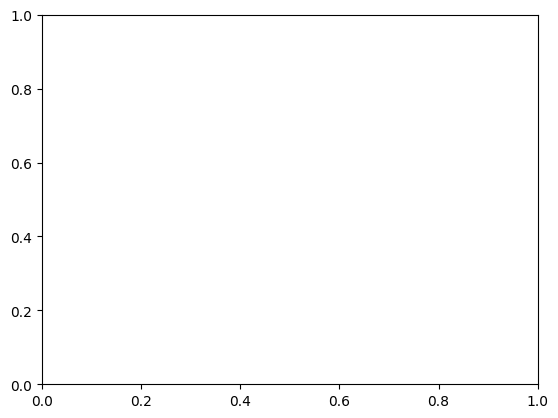

In [15]:
f, ax = plt.subplots()

Uma figura com múltiplas colunas terá o mesmo tamanho geral, mas os eixos serão comprimidos horizontalmente para caber no espaço:

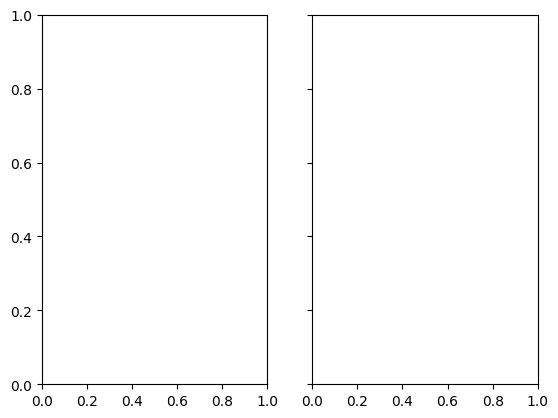

In [16]:
f, ax = plt.subplots(1, 2, sharey=True)

Em contraste, um gráfico criado por uma  `figure-level function `será quadrado. Para demonstrar isso, vamos configurar um gráfico vazio usando `FacetGrid` diretamente. Isso acontece nos bastidores em funções como `relplot()`, `displot()` ou `catplot()`:

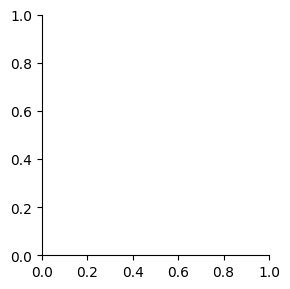

In [17]:
g = sns.FacetGrid(penguins)

Quando colunas adicionais são adicionadas, a própria figura se tornará mais larga, de modo que suas subparcelas terão o mesmo tamanho e formato:

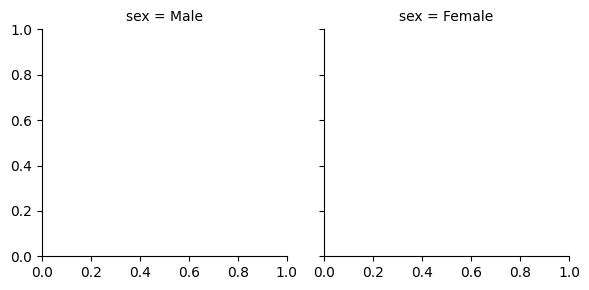

In [18]:
g = sns.FacetGrid(penguins, col="sex")

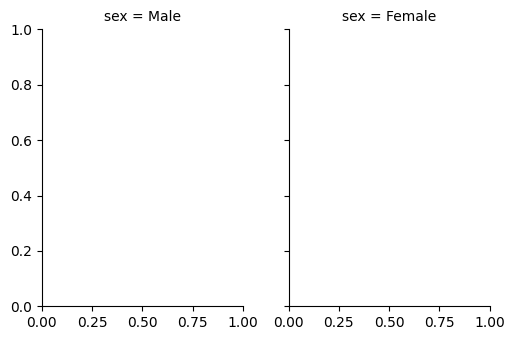

In [19]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

O resultado é que você pode atribuir variáveis ​​de facetação sem parar para pensar em como precisará ajustar o tamanho total da figura. Uma desvantagem é que, quando você quiser alterar o tamanho da figura, precisará lembrar que as coisas funcionam de maneira um pouco diferente do que no matplotlib.